In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data_1 = pd.read_csv('data_football.csv')
data_2 = pd.read_csv('formations_1718_premier_league.csv')

In [3]:
data_1 = data_1.drop(columns=['Unnamed: 0'])

In [4]:
data_1 = data_1.rename(columns={'Squad': 'team'})
data_1

,Rk,team,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper
0,1,Barcelona,ESP,1,29,23,4,2,53,9,44,73,2.52,55.9,22.7,33.2,1.14,83148,Robert Lewandowski - 17,Marc-André ter Stegen
1,2,Napoli,ITA,1,30,24,3,3,66,21,45,75,2.50,53.2,25.3,27.9,0.93,25662,Victor Osimhen - 21,Alex Meret
2,3,Paris S-G,FRA,1,32,24,3,5,75,31,44,75,2.34,64.7,39.1,25.7,0.80,40508,Kylian Mbappé - 22,Gianluigi Donnarumma
3,4,Arsenal,ENG,1,32,23,6,3,77,34,43,75,2.34,64.1,34.7,29.4,0.92,60203,Martinelli - 15,Aaron Ramsdale
4,5,Manchester City,ENG,2,30,22,4,4,78,28,50,70,2.33,63.5,24.5,39.0,1.30,53203,Erling Haaland - 32,Ederson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Ajaccio,FRA,19,31,6,3,22,22,58,-36,21,0.68,34.2,42.6,-8.4,-0.27,6422,Youcef Belaïli Mounaim El Idrissy - 6,Benjamin Leroy
94,95,Cremonese,ITA,19,30,3,10,17,27,54,-27,19,0.63,31.7,53.7,-22.0,-0.73,7651,Cyriel Dessers Daniel Ciofani - 6,Marco Carnesecchi
95,96,Sampdoria,ITA,20,31,3,8,20,20,52,-32,17,0.55,27.8,51.3,-23.5,-0.76,12107,Manolo Gabbiadini - 6,Emil Audero
96,97,Elche,ESP,20,29,2,7,20,20,59,-39,13,0.45,25.5,56.7,-31.1,-1.07,20872,Pere Milla - 6,Édgar Badía


In [5]:
data_2

,gameid,team,formation,players
0,22342,Arsenal,3-4-2-1,33;16 18 31;24 35 29 15;11 23;9
1,22342,Leicester City,4-4-1-1,1;2 5 15 28;26 22 25 11;20;9
2,22343,Brighton and Hove Albion,4-4-2,1;2 22 5 29;20 6 24 37;13 10
3,22343,Manchester City,3-1-4-2,31;4 5 30;25;2 17 21 3;10 33
4,22344,Chelsea,3-4-2-1,13;2 30 24;28 4 7 3;22 38;23
...,...,...,...,...
755,22719,Stoke City,4-3-3,1;2 17 6 3;4 55 27;22 25 18
756,22720,Tottenham Hotspur,4-2-3-1,1;37 4 15 3;17 12;11 23 27;10
757,22720,Leicester City,4-2-3-1,17;2 5 15 28;14 21;26 8 7;9
758,22721,West Ham United,3-4-2-1,13;41 21 3;5 8 16 26;18 10;7


In [6]:
data_2 = data_2.drop(columns=['gameid', 'players'], axis=1)

In [7]:
data_2 = data_2.drop_duplicates()

In [8]:
data_2[data_2['team'] == 'Arsenal']

,team,formation
0,Arsenal,3-4-2-1
331,Arsenal,4-3-3
360,Arsenal,4-2-3-1
460,Arsenal,4-1-4-1


In [9]:
data_433 = data_2[(data_2['formation'] == '4-3-3')]

In [10]:
data_2[ (data_2['formation'] == '4-3-3')].values

array([['Watford', '4-3-3'],
       ['Liverpool', '4-3-3'],
       ['Manchester City', '4-3-3'],
       ['Crystal Palace', '4-3-3'],
       ['Manchester United', '4-3-3'],
       ['Everton', '4-3-3'],
       ['West Bromwich Albion', '4-3-3'],
       ['Swansea City', '4-3-3'],
       ['West Ham United', '4-3-3'],
       ['Arsenal', '4-3-3'],
       ['Stoke City', '4-3-3'],
       ['Leicester City', '4-3-3'],
       ['Brighton and Hove Albion', '4-3-3']], dtype=object)

In [11]:
selected_teams = ['Arsenal', 'Manchester City', 'Liverpool', 'Crystal Palace', 'Leicester City', 'Everton']
data_selected_teams = data_433[data_433['team'].isin(selected_teams)]
data_selected_teams

,team,formation
17,Liverpool,4-3-3
41,Manchester City,4-3-3
65,Crystal Palace,4-3-3
106,Everton,4-3-3
331,Arsenal,4-3-3
566,Leicester City,4-3-3


In [12]:
data_total = pd.merge(data_1, data_selected_teams, on='team', how='outer')
data_total

,Rk,team,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,formation
0,1,Barcelona,ESP,1,29,23,4,2,53,9,...,73,2.52,55.9,22.7,33.2,1.14,83148,Robert Lewandowski - 17,Marc-André ter Stegen,NaN
1,2,Napoli,ITA,1,30,24,3,3,66,21,...,75,2.50,53.2,25.3,27.9,0.93,25662,Victor Osimhen - 21,Alex Meret,NaN
2,3,Paris S-G,FRA,1,32,24,3,5,75,31,...,75,2.34,64.7,39.1,25.7,0.80,40508,Kylian Mbappé - 22,Gianluigi Donnarumma,NaN
3,4,Arsenal,ENG,1,32,23,6,3,77,34,...,75,2.34,64.1,34.7,29.4,0.92,60203,Martinelli - 15,Aaron Ramsdale,4-3-3
4,5,Manchester City,ENG,2,30,22,4,4,78,28,...,70,2.33,63.5,24.5,39.0,1.30,53203,Erling Haaland - 32,Ederson,4-3-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Ajaccio,FRA,19,31,6,3,22,22,58,...,21,0.68,34.2,42.6,-8.4,-0.27,6422,Youcef Belaïli Mounaim El Idrissy - 6,Benjamin Leroy,NaN
94,95,Cremonese,ITA,19,30,3,10,17,27,54,...,19,0.63,31.7,53.7,-22.0,-0.73,7651,Cyriel Dessers Daniel Ciofani - 6,Marco Carnesecchi,NaN
95,96,Sampdoria,ITA,20,31,3,8,20,20,52,...,17,0.55,27.8,51.3,-23.5,-0.76,12107,Manolo Gabbiadini - 6,Emil Audero,NaN
96,97,Elche,ESP,20,29,2,7,20,20,59,...,13,0.45,25.5,56.7,-31.1,-1.07,20872,Pere Milla - 6,Édgar Badía,NaN


In [13]:
data_total.loc[data_total['team'].isin(['Barcelona', 'Real Madrid', 'Bayern Munich', 'Chelsea', 'Paris S-G', 'Monaco','West Ham','Fulham', 'Brighton' ]), 'formation'] = '4-3-3'

In [14]:
data_total['team'].values

array(['Barcelona', 'Napoli', 'Paris S-G', 'Arsenal', 'Manchester City',
       'Real Madrid', 'Dortmund', 'Atlético Madrid', 'Lens', 'Marseille',
       'Bayern Munich', 'Lazio', 'Juventus', 'Manchester Utd', 'Monaco',
       'Newcastle Utd', 'Roma', 'Union Berlin', 'RB Leipzig',
       'Real Sociedad', 'Freiburg', 'Milan', 'Lille', 'Rennes',
       'Tottenham', 'Inter', 'Brighton', 'Atalanta', 'Villarreal',
       'Liverpool', 'Lyon', 'Betis', 'Aston Villa', 'Leverkusen',
       'Mainz 05', 'Athletic Club', 'Reims', 'Wolfsburg', 'Nice',
       'Eint Frankfurt', 'Fulham', 'Lorient', 'Bologna', 'Fiorentina',
       'Clermont Foot', 'Brentford', 'Osasuna', 'Torino',
       'Rayo Vallecano', 'Udinese', "M'Gladbach", 'Sassuolo', 'Mallorca',
       'Girona', 'Monza', 'Chelsea', 'Toulouse', 'Köln', 'Sevilla',
       'Werder Bremen', 'Celta Vigo', 'Montpellier', 'Valladolid',
       'Crystal Palace', 'Getafe', 'Empoli', 'Cádiz', 'Salernitana',
       'Wolves', 'Bournemouth', 'West Ham', 'Aug

In [15]:
data_total.loc[data_total['team'].isin(['Tottenham', 'RB Leipzig','Leverkusen', 'Wolfsburg', 'Athletic Club', 'Atlético Madrid', 'Milan', 'Roma', 'Sevilla', 'Napoli']), 'formation'] = '3-4-3'

In [16]:
data_total

,Rk,team,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,formation
0,1,Barcelona,ESP,1,29,23,4,2,53,9,...,73,2.52,55.9,22.7,33.2,1.14,83148,Robert Lewandowski - 17,Marc-André ter Stegen,4-3-3
1,2,Napoli,ITA,1,30,24,3,3,66,21,...,75,2.50,53.2,25.3,27.9,0.93,25662,Victor Osimhen - 21,Alex Meret,3-4-3
2,3,Paris S-G,FRA,1,32,24,3,5,75,31,...,75,2.34,64.7,39.1,25.7,0.80,40508,Kylian Mbappé - 22,Gianluigi Donnarumma,4-3-3
3,4,Arsenal,ENG,1,32,23,6,3,77,34,...,75,2.34,64.1,34.7,29.4,0.92,60203,Martinelli - 15,Aaron Ramsdale,4-3-3
4,5,Manchester City,ENG,2,30,22,4,4,78,28,...,70,2.33,63.5,24.5,39.0,1.30,53203,Erling Haaland - 32,Ederson,4-3-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Ajaccio,FRA,19,31,6,3,22,22,58,...,21,0.68,34.2,42.6,-8.4,-0.27,6422,Youcef Belaïli Mounaim El Idrissy - 6,Benjamin Leroy,NaN
94,95,Cremonese,ITA,19,30,3,10,17,27,54,...,19,0.63,31.7,53.7,-22.0,-0.73,7651,Cyriel Dessers Daniel Ciofani - 6,Marco Carnesecchi,NaN
95,96,Sampdoria,ITA,20,31,3,8,20,20,52,...,17,0.55,27.8,51.3,-23.5,-0.76,12107,Manolo Gabbiadini - 6,Emil Audero,NaN
96,97,Elche,ESP,20,29,2,7,20,20,59,...,13,0.45,25.5,56.7,-31.1,-1.07,20872,Pere Milla - 6,Édgar Badía,NaN


In [17]:
data_total['win_rate'] = data_total['W'] / data_total['MP'] *  100 
data_total['loss_rate'] = data_total['L'] / data_total['MP'] * 100
data_total['draw_rate'] = data_total['D'] / data_total['MP'] * 100

data_total

,Rk,team,Country,LgRk,MP,W,D,L,GF,GA,...,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,formation,win_rate,loss_rate,draw_rate
0,1,Barcelona,ESP,1,29,23,4,2,53,9,...,22.7,33.2,1.14,83148,Robert Lewandowski - 17,Marc-André ter Stegen,4-3-3,79.310345,6.896552,13.793103
1,2,Napoli,ITA,1,30,24,3,3,66,21,...,25.3,27.9,0.93,25662,Victor Osimhen - 21,Alex Meret,3-4-3,80.000000,10.000000,10.000000
2,3,Paris S-G,FRA,1,32,24,3,5,75,31,...,39.1,25.7,0.80,40508,Kylian Mbappé - 22,Gianluigi Donnarumma,4-3-3,75.000000,15.625000,9.375000
3,4,Arsenal,ENG,1,32,23,6,3,77,34,...,34.7,29.4,0.92,60203,Martinelli - 15,Aaron Ramsdale,4-3-3,71.875000,9.375000,18.750000
4,5,Manchester City,ENG,2,30,22,4,4,78,28,...,24.5,39.0,1.30,53203,Erling Haaland - 32,Ederson,4-3-3,73.333333,13.333333,13.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Ajaccio,FRA,19,31,6,3,22,22,58,...,42.6,-8.4,-0.27,6422,Youcef Belaïli Mounaim El Idrissy - 6,Benjamin Leroy,NaN,19.354839,70.967742,9.677419
94,95,Cremonese,ITA,19,30,3,10,17,27,54,...,53.7,-22.0,-0.73,7651,Cyriel Dessers Daniel Ciofani - 6,Marco Carnesecchi,NaN,10.000000,56.666667,33.333333
95,96,Sampdoria,ITA,20,31,3,8,20,20,52,...,51.3,-23.5,-0.76,12107,Manolo Gabbiadini - 6,Emil Audero,NaN,9.677419,64.516129,25.806452
96,97,Elche,ESP,20,29,2,7,20,20,59,...,56.7,-31.1,-1.07,20872,Pere Milla - 6,Édgar Badía,NaN,6.896552,68.965517,24.137931


In [18]:
# Danh sách các đội hình
formations = ['4-2-3-1', '4-4-2', '4-3-1-2', '3-4-2-1', '4-2-2-2', '3-4-3', '4-3-3']

# Chọn các hàng có giá trị NaN trong cột 'formation' và gán ngẫu nhiên các đội hình từ danh sách formations
nan_indices = data_total[data_total['formation'].isnull()].index
data_total.loc[nan_indices, 'formation'] = np.random.choice(formations, size=len(nan_indices))

# In ra data_totalFrame sau khi đã thêm các giá trị ngẫu nhiên
print(data_total)


    Rk             team Country  LgRk  MP   W   D   L  GF  GA  ...   xGA  \
0    1        Barcelona     ESP     1  29  23   4   2  53   9  ...  22.7   
1    2           Napoli     ITA     1  30  24   3   3  66  21  ...  25.3   
2    3        Paris S-G     FRA     1  32  24   3   5  75  31  ...  39.1   
3    4          Arsenal     ENG     1  32  23   6   3  77  34  ...  34.7   
4    5  Manchester City     ENG     2  30  22   4   4  78  28  ...  24.5   
..  ..              ...     ...   ...  ..  ..  ..  ..  ..  ..  ...   ...   
93  94          Ajaccio     FRA    19  31   6   3  22  22  58  ...  42.6   
94  95        Cremonese     ITA    19  30   3  10  17  27  54  ...  53.7   
95  96        Sampdoria     ITA    20  31   3   8  20  20  52  ...  51.3   
96  97            Elche     ESP    20  29   2   7  20  20  59  ...  56.7   
97  98           Angers     FRA    20  32   3   5  24  25  68  ...  51.9   

     xGD  xGD/90  Attendance                        Top Team Scorer  \
0   33.2    1.14

In [19]:
data_total.columns

Index(['Rk', 'team', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance',
       'Top Team Scorer', 'Goalkeeper', 'formation', 'win_rate', 'loss_rate',
       'draw_rate'],
      dtype='object')

C:\Users\Admin\AppData\Local\Temp\ipykernel_13164\2802285891.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=formation_win_rate, x='formation', y='win_rate', palette='viridis', ax=axes[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_13164\2802285891.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(formation_win_rate['formation'], rotation=45)


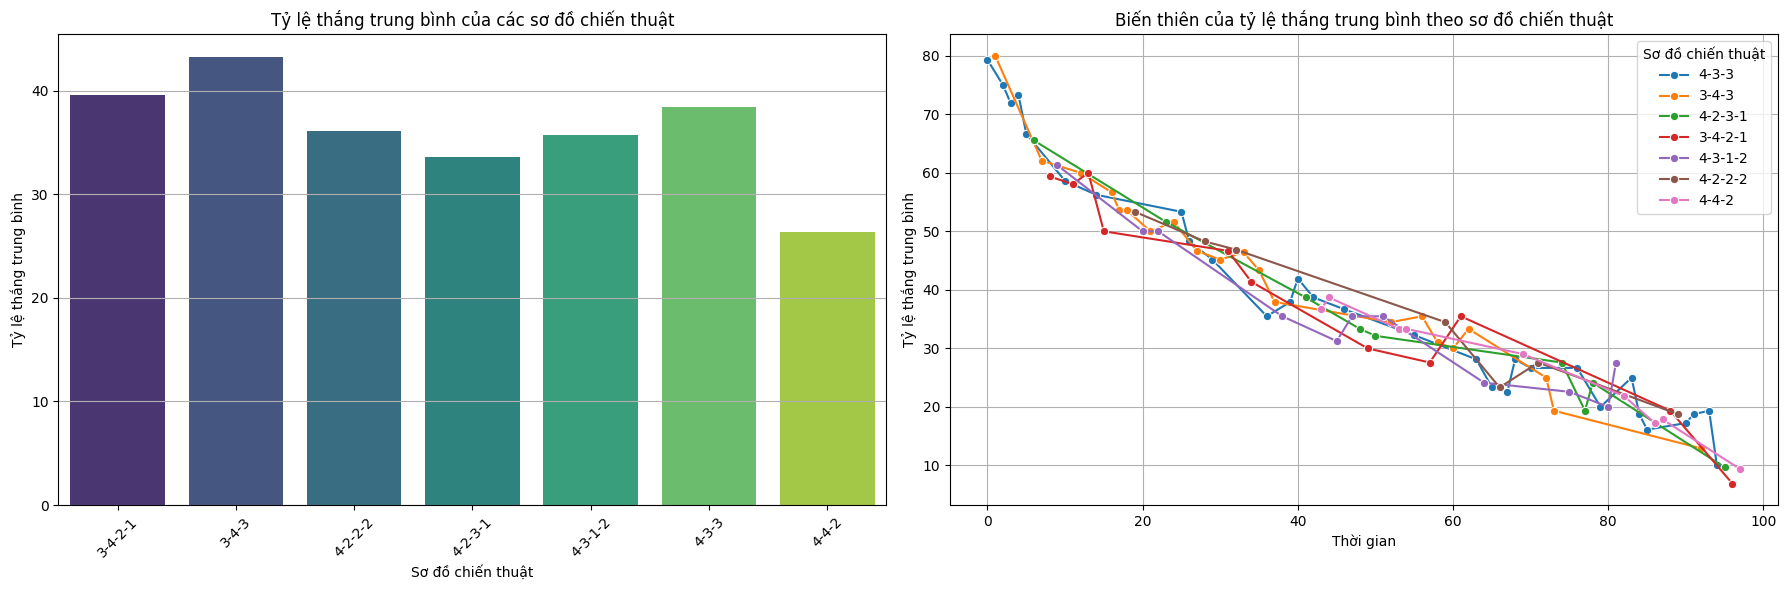

In [20]:
formation_win_rate = data_total.groupby('formation')['win_rate'].mean().reset_index()

# Tạo figure và axes cho hai biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Biểu đồ cột
sns.barplot(data=formation_win_rate, x='formation', y='win_rate', palette='viridis', ax=axes[0])
axes[0].set_title('Tỷ lệ thắng trung bình của các sơ đồ chiến thuật')
axes[0].set_xlabel('Sơ đồ chiến thuật')
axes[0].set_ylabel('Tỷ lệ thắng trung bình')
axes[0].set_xticklabels(formation_win_rate['formation'], rotation=45)
axes[0].grid(axis='y')

# Biểu đồ đường
sns.lineplot(data=data_total, x=data_total.index, y='win_rate', hue='formation', marker='o', ax=axes[1])
axes[1].set_title('Biến thiên của tỷ lệ thắng trung bình theo sơ đồ chiến thuật')
axes[1].set_xlabel('Thời gian')
axes[1].set_ylabel('Tỷ lệ thắng trung bình')
axes[1].legend(title='Sơ đồ chiến thuật')
axes[1].grid(True)

plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_13164\3859058519.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=formation_draw_rate, x='formation', y='draw_rate', palette='viridis', ax=axes[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_13164\3859058519.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(formation_draw_rate['formation'], rotation=45)


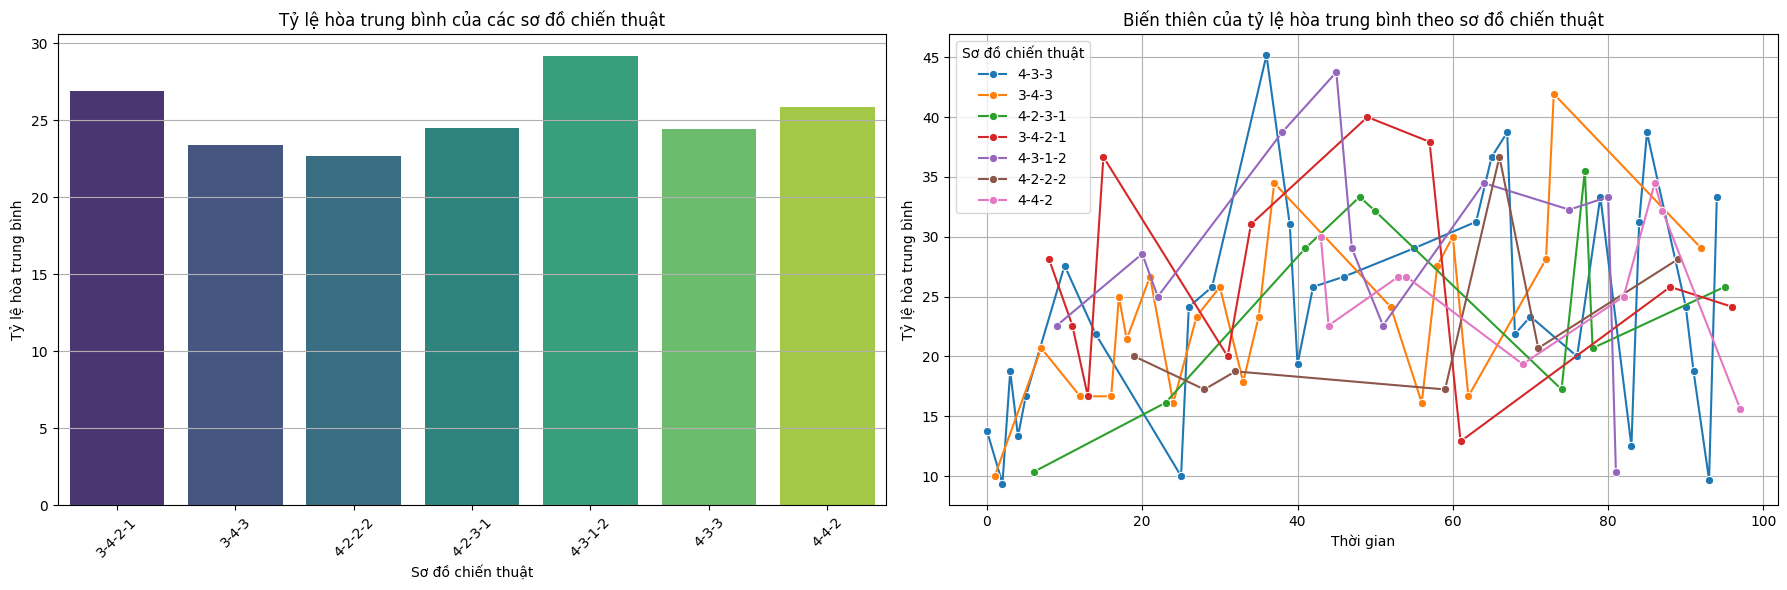

In [46]:
# Tính tỷ lệ hòa trung bình cho từng sơ đồ chiến thuật
formation_draw_rate = data_total.groupby('formation')['draw_rate'].mean().reset_index()

# Tạo figure và axes cho biểu đồ tỷ lệ hòa
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Biểu đồ cột tỷ lệ hòa
sns.barplot(data=formation_draw_rate, x='formation', y='draw_rate', palette='viridis', ax=axes[0])
axes[0].set_title('Tỷ lệ hòa trung bình của các sơ đồ chiến thuật')
axes[0].set_xlabel('Sơ đồ chiến thuật')
axes[0].set_ylabel('Tỷ lệ hòa trung bình')
axes[0].set_xticklabels(formation_draw_rate['formation'], rotation=45)
axes[0].grid(axis='y')

# Biểu đồ đường biểu diễn biến thiên của tỷ lệ hòa
sns.lineplot(data=data_total, x=data_total.index, y='draw_rate', hue='formation', marker='o', ax=axes[1])
axes[1].set_title('Biến thiên của tỷ lệ hòa trung bình theo sơ đồ chiến thuật')
axes[1].set_xlabel('Thời gian')
axes[1].set_ylabel('Tỷ lệ hòa trung bình')
axes[1].legend(title='Sơ đồ chiến thuật')
axes[1].grid(True)

plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_13164\294362200.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=formation_loss_rate, x='formation', y='loss_rate', palette='viridis', ax=axes[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_13164\294362200.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(formation_loss_rate['formation'], rotation=45)


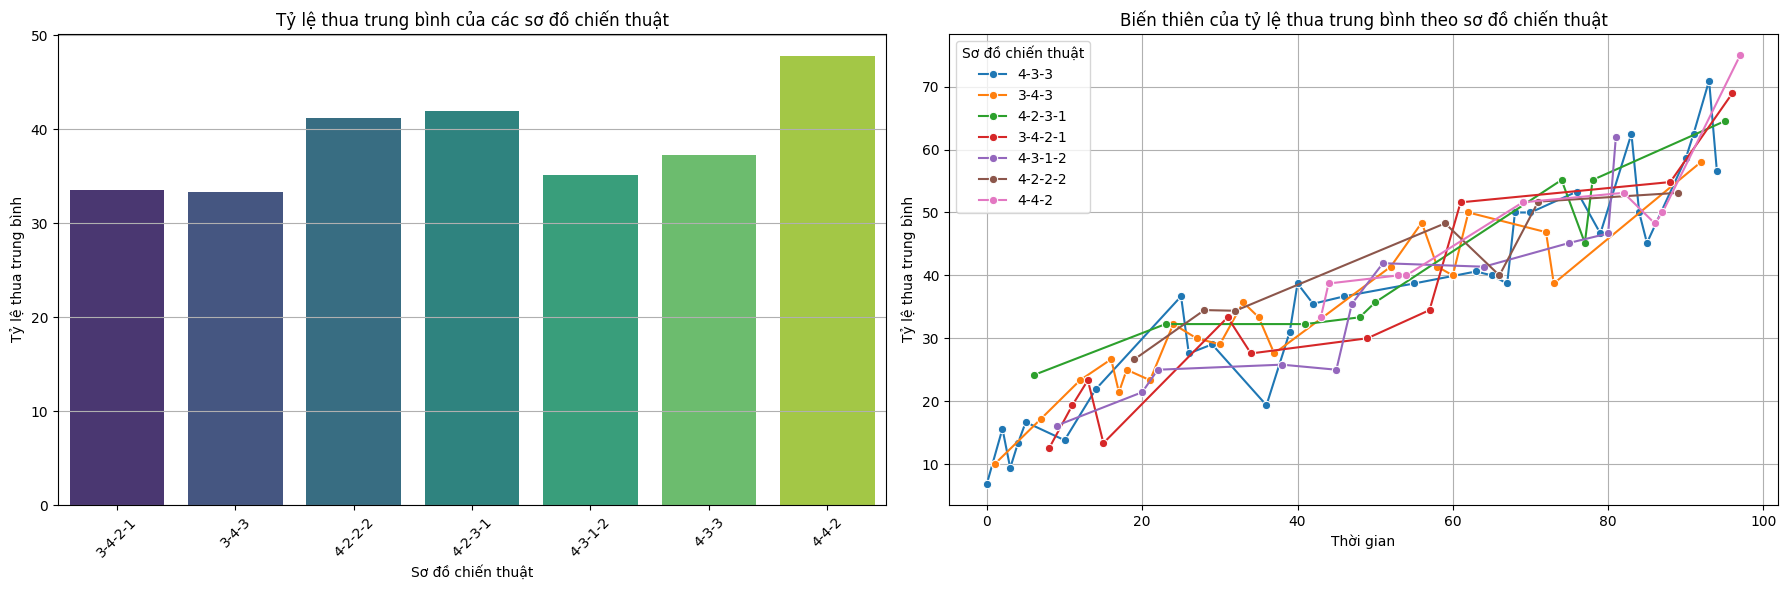

In [22]:
# Tính tỷ lệ thua trung bình cho từng sơ đồ chiến thuật
formation_loss_rate = data_total.groupby('formation')['loss_rate'].mean().reset_index()

# Tạo figure và axes cho biểu đồ tỷ lệ thua
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Biểu đồ cột tỷ lệ thua
sns.barplot(data=formation_loss_rate, x='formation', y='loss_rate', palette='viridis', ax=axes[0])
axes[0].set_title('Tỷ lệ thua trung bình của các sơ đồ chiến thuật')
axes[0].set_xlabel('Sơ đồ chiến thuật')
axes[0].set_ylabel('Tỷ lệ thua trung bình')
axes[0].set_xticklabels(formation_loss_rate['formation'], rotation=45)
axes[0].grid(axis='y')

# Biểu đồ đường biểu diễn biến thiên của tỷ lệ thua
sns.lineplot(data=data_total, x=data_total.index, y='loss_rate', hue='formation', marker='o', ax=axes[1])
axes[1].set_title('Biến thiên của tỷ lệ thua trung bình theo sơ đồ chiến thuật')
axes[1].set_xlabel('Thời gian')
axes[1].set_ylabel('Tỷ lệ thua trung bình')
axes[1].legend(title='Sơ đồ chiến thuật')
axes[1].grid(True)

plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_13164\970949296.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_total, x='formation', y='xG', palette='viridis', ax=axes[0, 0], order=unique_formations)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13164\970949296.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(unique_formations, rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13164\970949296.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_total, x='formation', y='xGA', palette='viridis', ax=axes[0, 1], order=unique_formations)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13164\970949296.py:23: Use

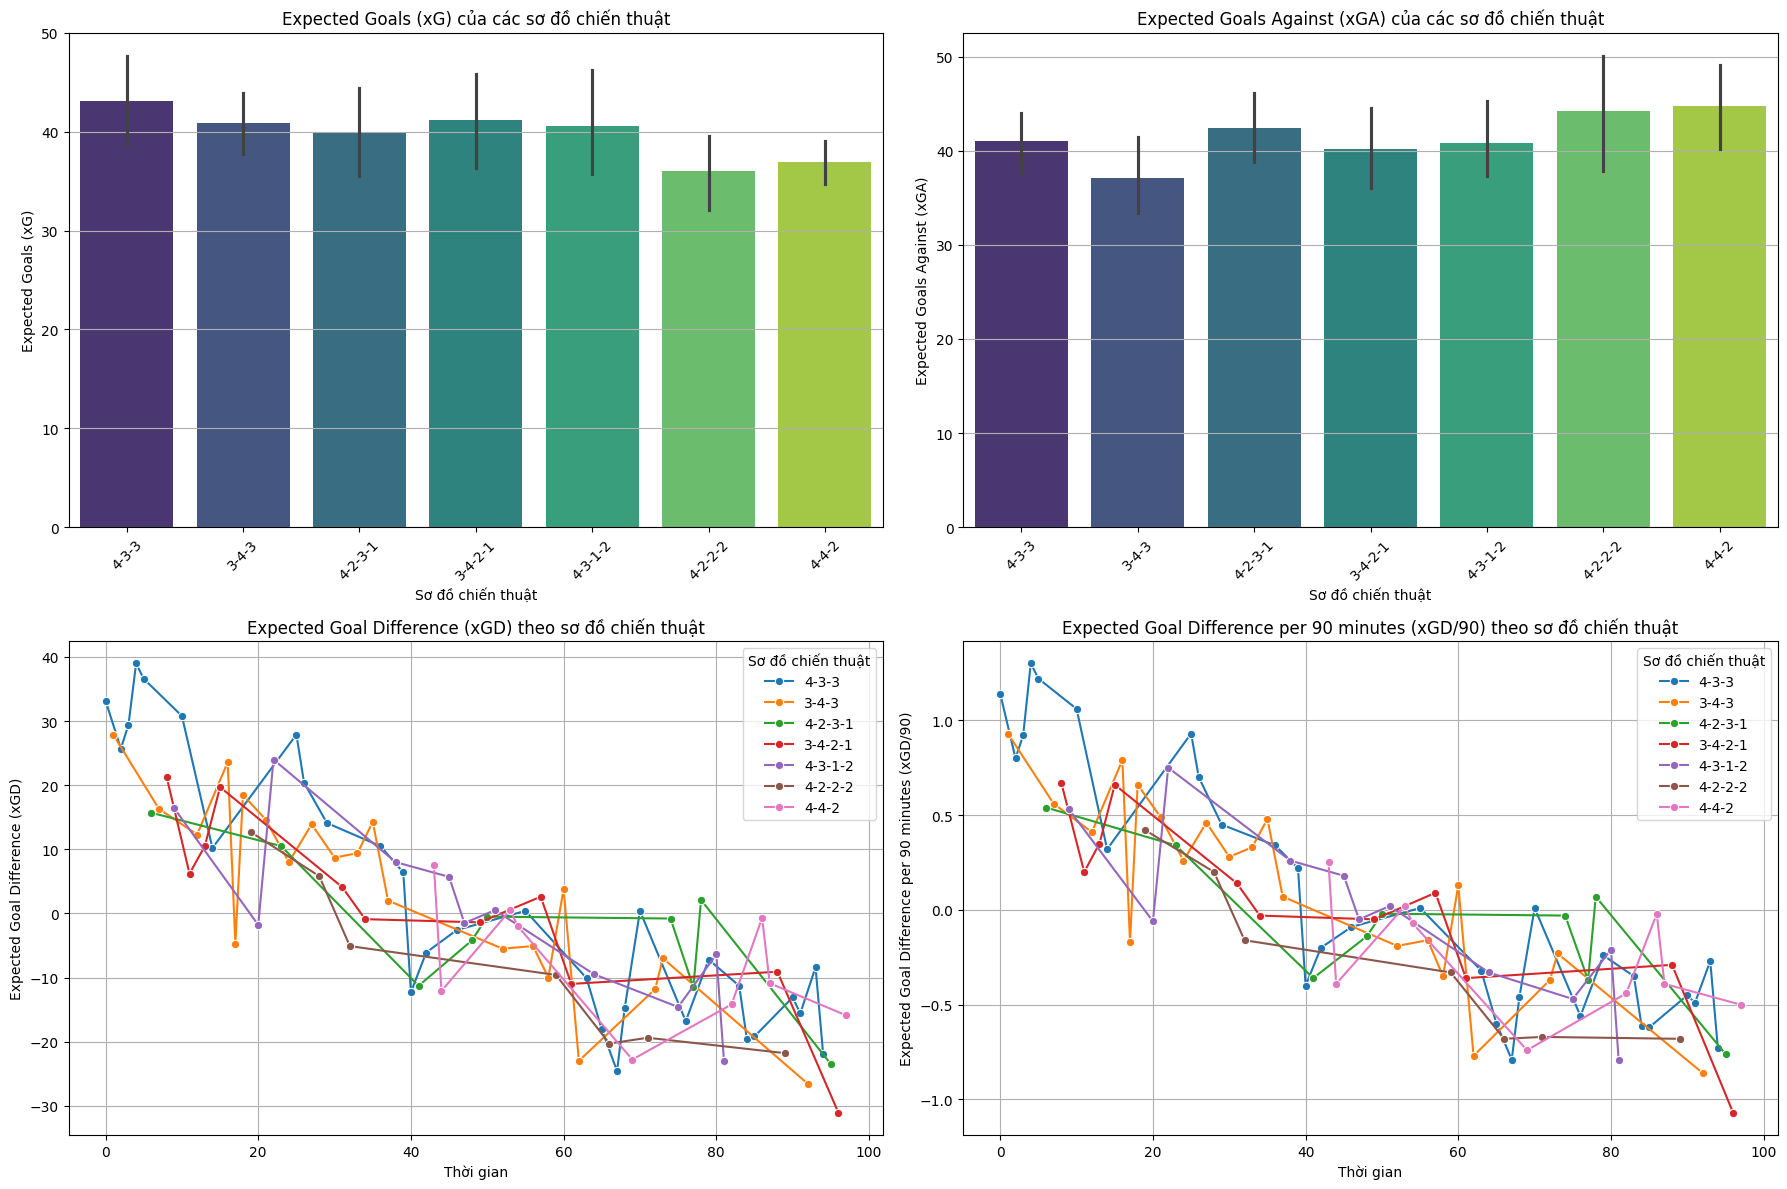

In [23]:
# Loại bỏ các bản sao của các sơ đồ chiến thuật
unique_formations = data_total['formation'].unique()

# Tạo figure và axes
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Biểu đồ cột xG
sns.barplot(data=data_total, x='formation', y='xG', palette='viridis', ax=axes[0, 0], order=unique_formations)
axes[0, 0].set_title('Expected Goals (xG) của các sơ đồ chiến thuật')
axes[0, 0].set_xlabel('Sơ đồ chiến thuật')
axes[0, 0].set_ylabel('Expected Goals (xG)')
axes[0, 0].set_xticklabels(unique_formations, rotation=45)
axes[0, 0].grid(axis='y')

# Biểu đồ cột xGA
sns.barplot(data=data_total, x='formation', y='xGA', palette='viridis', ax=axes[0, 1], order=unique_formations)
axes[0, 1].set_title('Expected Goals Against (xGA) của các sơ đồ chiến thuật')
axes[0, 1].set_xlabel('Sơ đồ chiến thuật')
axes[0, 1].set_ylabel('Expected Goals Against (xGA)')
axes[0, 1].set_xticklabels(unique_formations, rotation=45)
axes[0, 1].grid(axis='y')

# Biểu đồ đường xGD
sns.lineplot(data=data_total, x=data_total.index, y='xGD', hue='formation', marker='o', ax=axes[1, 0])
axes[1, 0].set_title('Expected Goal Difference (xGD) theo sơ đồ chiến thuật')
axes[1, 0].set_xlabel('Thời gian')
axes[1, 0].set_ylabel('Expected Goal Difference (xGD)')
axes[1, 0].legend(title='Sơ đồ chiến thuật')
axes[1, 0].grid(True)

# Biểu đồ đường xGD/90
sns.lineplot(data=data_total, x=data_total.index, y='xGD/90', hue='formation', marker='o', ax=axes[1, 1])
axes[1, 1].set_title('Expected Goal Difference per 90 minutes (xGD/90) theo sơ đồ chiến thuật')
axes[1, 1].set_xlabel('Thời gian')
axes[1, 1].set_ylabel('Expected Goal Difference per 90 minutes (xGD/90)')
axes[1, 1].legend(title='Sơ đồ chiến thuật')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_13164\2731879637.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data_total, x='formation', y='Pts/MP', palette='viridis')


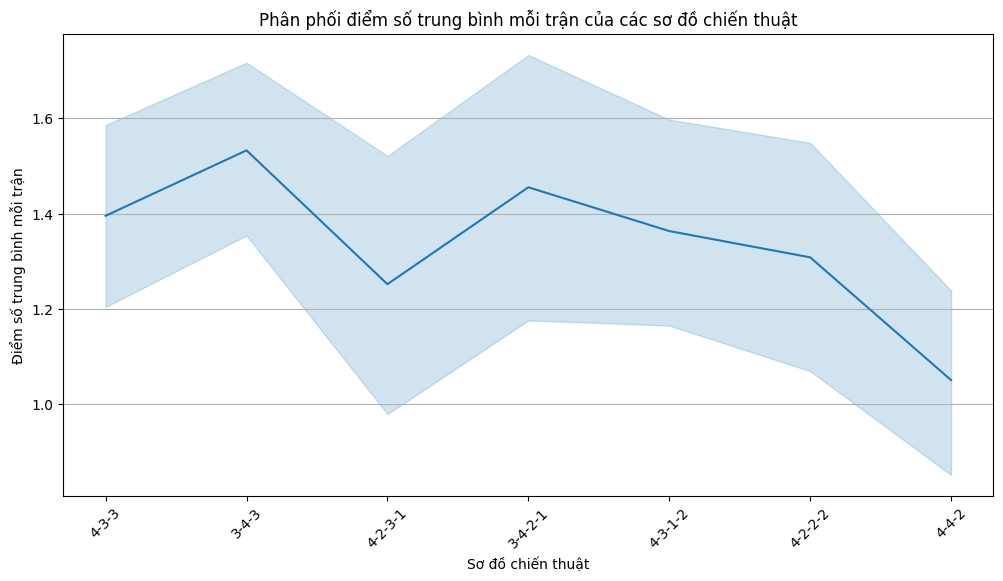

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_total, x='formation', y='Pts/MP', palette='viridis')
plt.title('Phân phối điểm số trung bình mỗi trận của các sơ đồ chiến thuật')
plt.xlabel('Sơ đồ chiến thuật')
plt.ylabel('Điểm số trung bình mỗi trận')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


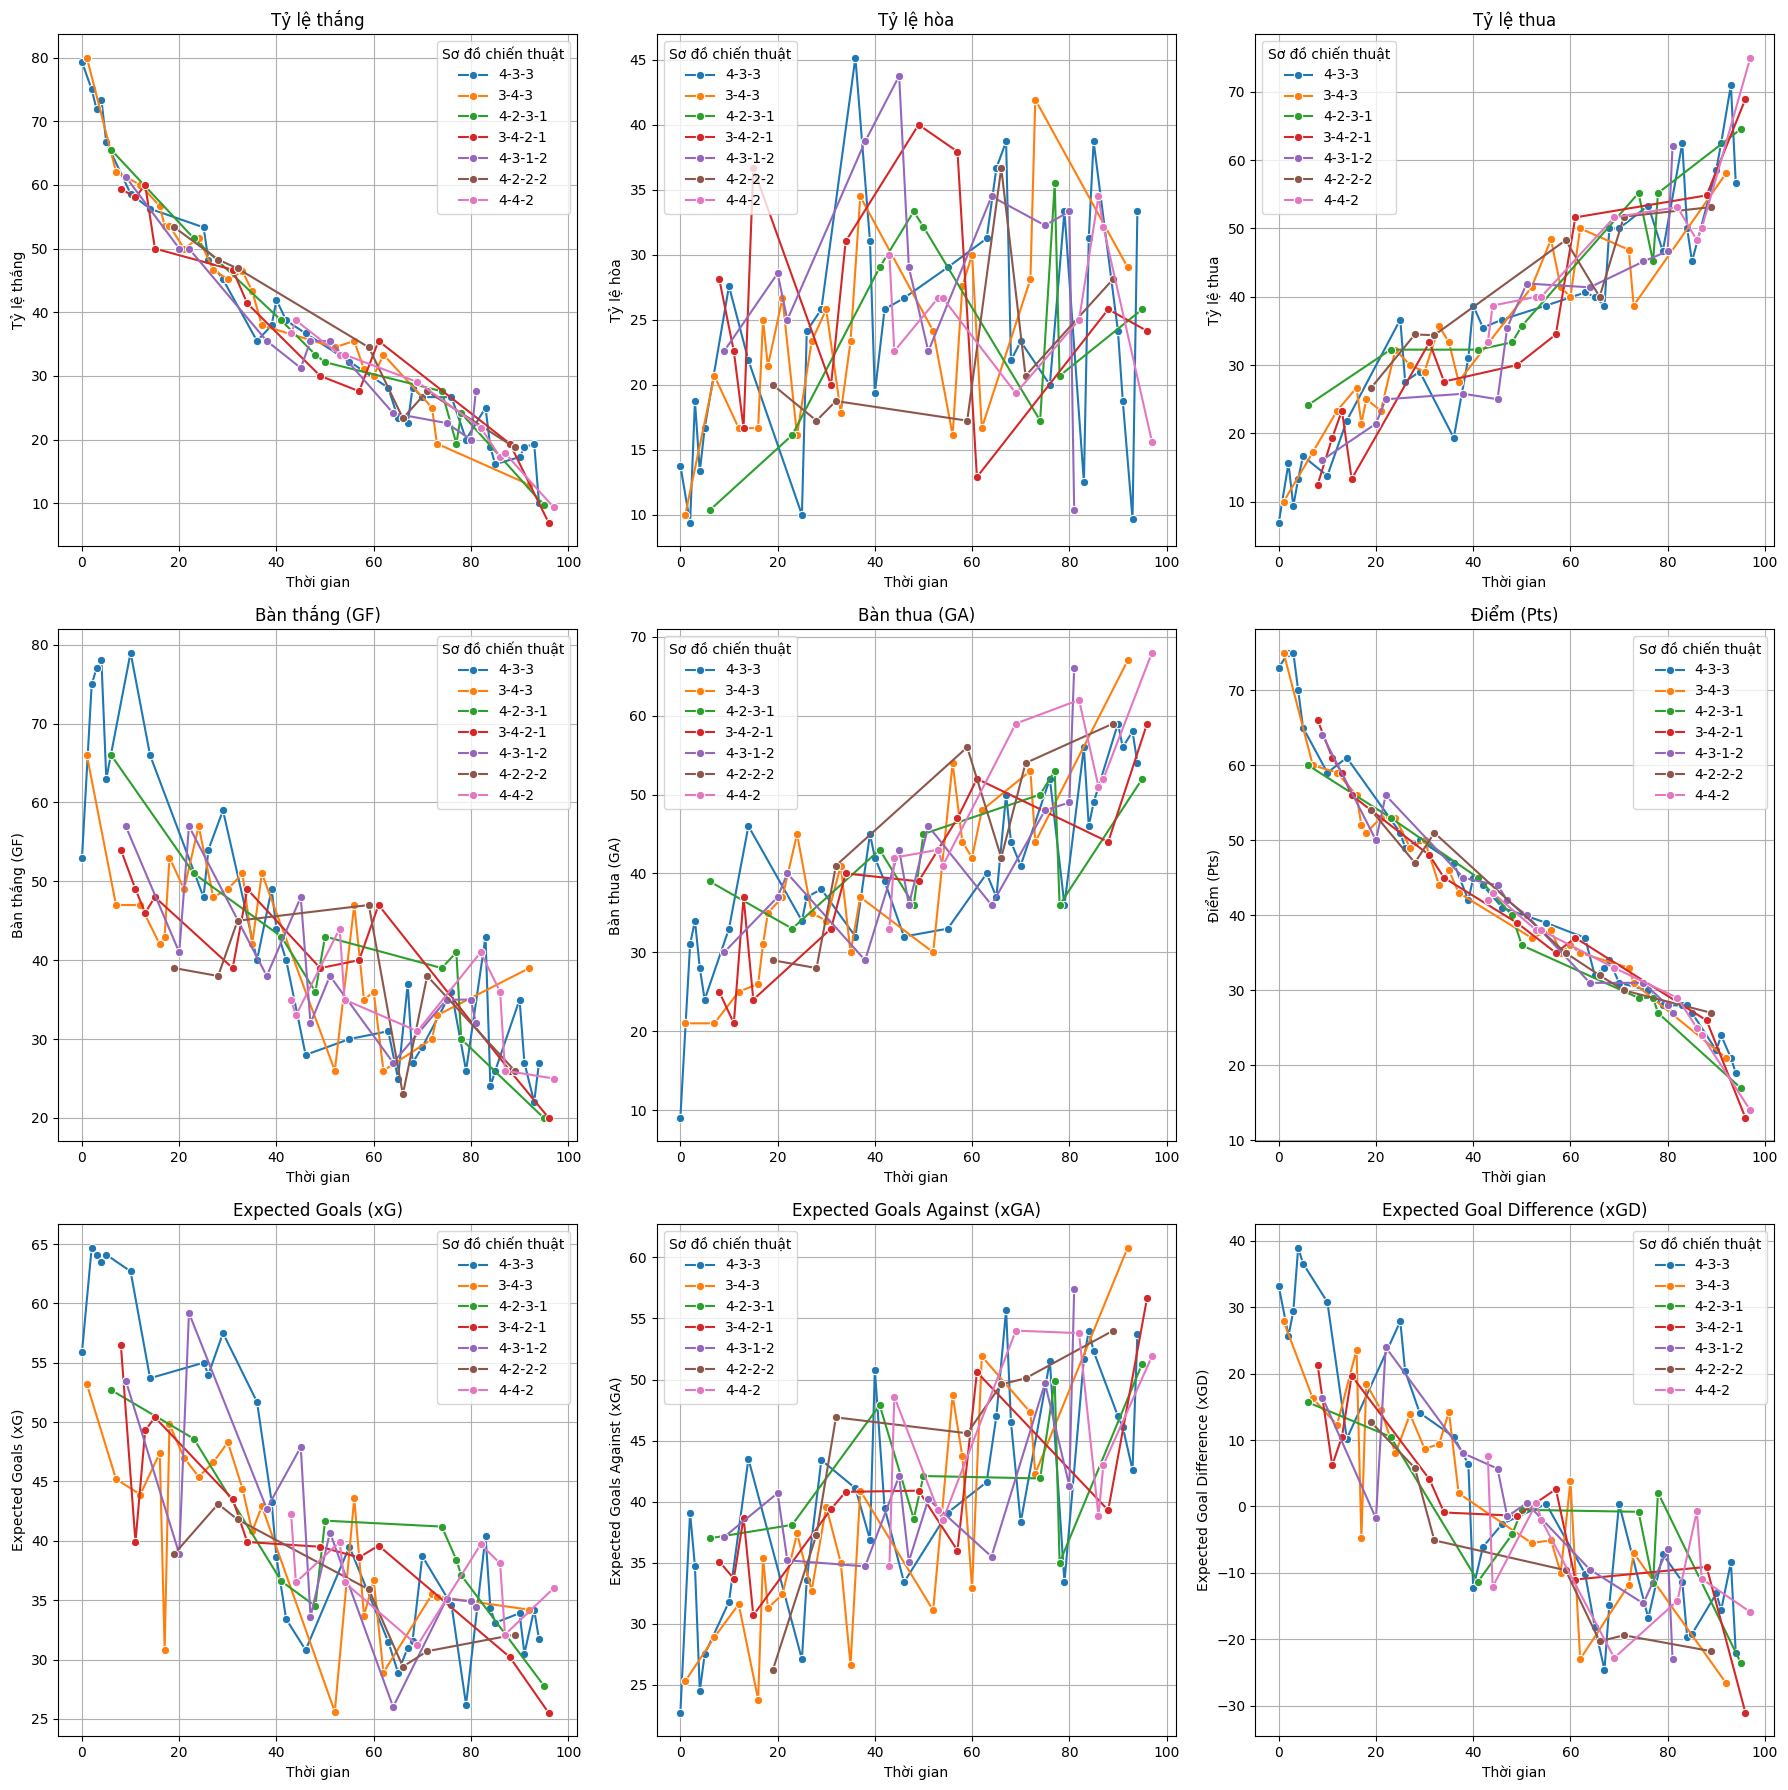

In [33]:
# Tính toán các chỉ số hiệu suất trung bình cho từng sơ đồ chiến thuật
formation_performance = data_total.groupby('formation').agg({
    'win_rate': 'mean',
    'draw_rate': 'mean',
    'loss_rate': 'mean',
    'GF': 'mean',
    'GA': 'mean',
    'Pts': 'mean',
    'xG': 'mean',
    'xGA': 'mean',
    'xGD': 'mean'
}).reset_index()

# Vẽ biểu đồ cột cho các chỉ số hiệu suất
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

metrics = ['win_rate', 'draw_rate', 'loss_rate', 'GF', 'GA', 'Pts', 'xG', 'xGA', 'xGD']
titles = ['Tỷ lệ thắng', 'Tỷ lệ hòa', 'Tỷ lệ thua', 'Bàn thắng (GF)', 'Bàn thua (GA)', 'Điểm (Pts)', 'Expected Goals (xG)', 'Expected Goals Against (xGA)', 'Expected Goal Difference (xGD)']

for i, ax in enumerate(axes.flatten()):
    sns.lineplot(data=data_total, x=data_total.index, y=metrics[i], hue='formation', marker='o', ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel('Thời gian')
    ax.set_ylabel(titles[i])
    ax.legend(title='Sơ đồ chiến thuật')
    ax.grid(True)

plt.tight_layout()
plt.show()



In [25]:
data_total['formation'].value_counts()

formation
4-3-3      30
3-4-3      21
3-4-2-1    11
4-3-1-2    11
4-2-3-1     9
4-4-2       9
4-2-2-2     7
Name: count, dtype: int64

In [26]:
# Kiểm tra xem các đội bóng thuộc top 5 giải đấu lớn của Châu Âu ưa chuộng sơ đồ đội hình nào
# đưa ra kết luận về những con số trên
data_total['formation'].value_counts()

formation
4-3-3      30
3-4-3      21
3-4-2-1    11
4-3-1-2    11
4-2-3-1     9
4-4-2       9
4-2-2-2     7
Name: count, dtype: int64

In [27]:
# liệt kê những đội bóng sử dụng sơ đồ chiến thuật 4-3-3
data_total[data_total['formation'] == '4-3-3']
# có thể thấy các đội bóng sử dụng sơ đồ chiến thuật 4-3-3 chủ yếu là các đội bóng lớn của Châu Âu và có thứ hạng cao trong mỗi giải đấu quốc nội => cho thấy sơ đồ này...

,Rk,team,Country,LgRk,MP,W,D,L,GF,GA,...,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,formation,win_rate,loss_rate,draw_rate
0,1,Barcelona,ESP,1,29,23,4,2,53,9,...,22.7,33.2,1.14,83148,Robert Lewandowski - 17,Marc-André ter Stegen,4-3-3,79.310345,6.896552,13.793103
2,3,Paris S-G,FRA,1,32,24,3,5,75,31,...,39.1,25.7,0.80,40508,Kylian Mbappé - 22,Gianluigi Donnarumma,4-3-3,75.000000,15.625000,9.375000
3,4,Arsenal,ENG,1,32,23,6,3,77,34,...,34.7,29.4,0.92,60203,Martinelli - 15,Aaron Ramsdale,4-3-3,71.875000,9.375000,18.750000
4,5,Manchester City,ENG,2,30,22,4,4,78,28,...,24.5,39.0,1.30,53203,Erling Haaland - 32,Ederson,4-3-3,73.333333,13.333333,13.333333
5,6,Real Madrid,ESP,2,30,20,5,5,63,24,...,27.5,36.6,1.22,57300,Karim Benzema - 14,Thibaut Courtois,4-3-3,66.666667,16.666667,16.666667
10,11,Bayern Munich,GER,2,29,17,8,4,79,33,...,31.8,30.8,1.06,75000,Jamal Musiala - 11,Yann Sommer,4-3-3,58.620690,13.793103,27.586207
14,15,Monaco,FRA,4,32,18,7,7,66,46,...,43.5,10.2,0.32,6498,Wissam Ben Yedder - 17,Alexander Nübel,4-3-3,56.250000,21.875000,21.875000
25,26,Inter,ITA,6,30,16,3,11,48,34,...,27.1,27.9,0.93,41524,Lautaro Martínez - 14,André Onana,4-3-3,53.333333,36.666667,10.000000
26,27,Brighton,ENG,8,29,14,7,8,54,37,...,33.6,20.4,0.70,31460,Alexis Mac Allister - 8,Robert Sánchez,4-3-3,48.275862,27.586207,24.137931
29,30,Liverpool,ENG,7,31,14,8,9,59,38,...,43.4,14.1,0.45,49655,Mohamed Salah - 16,Alisson,4-3-3,45.161290,29.032258,25.806452


<Axes: xlabel='formation'>

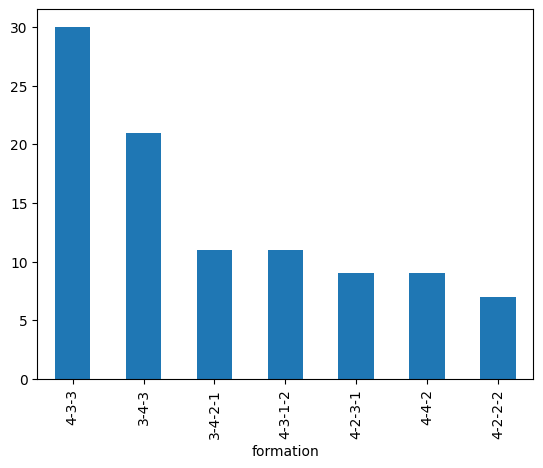

In [28]:
data_total['formation'].value_counts().plot(kind='bar')

C:\Users\Admin\AppData\Local\Temp\ipykernel_13164\346164917.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data_total, x='formation', y='W', ci=None)


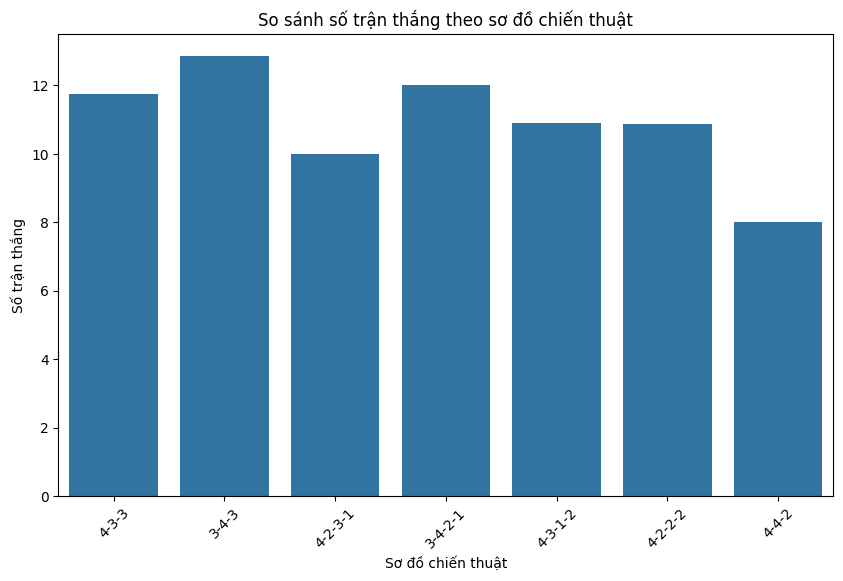

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(data_total, x='formation', y='W', ci=None)
plt.title('So sánh số trận thắng theo sơ đồ chiến thuật')
plt.xlabel('Sơ đồ chiến thuật')
plt.ylabel('Số trận thắng')
plt.xticks(rotation=45)
plt.show()


In [34]:
data_total.columns

Index(['Rk', 'team', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance',
       'Top Team Scorer', 'Goalkeeper', 'formation', 'win_rate', 'loss_rate',
       'draw_rate'],
      dtype='object')

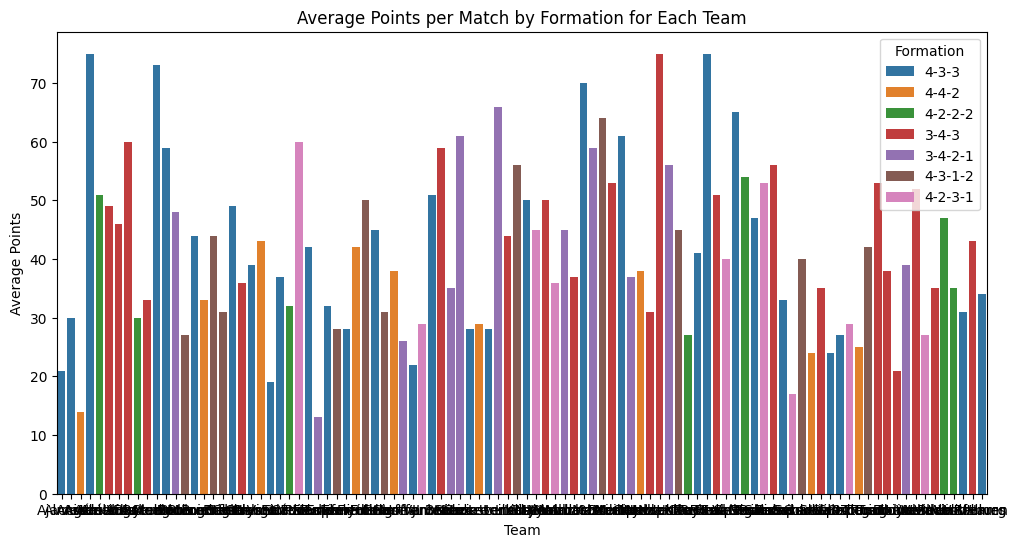

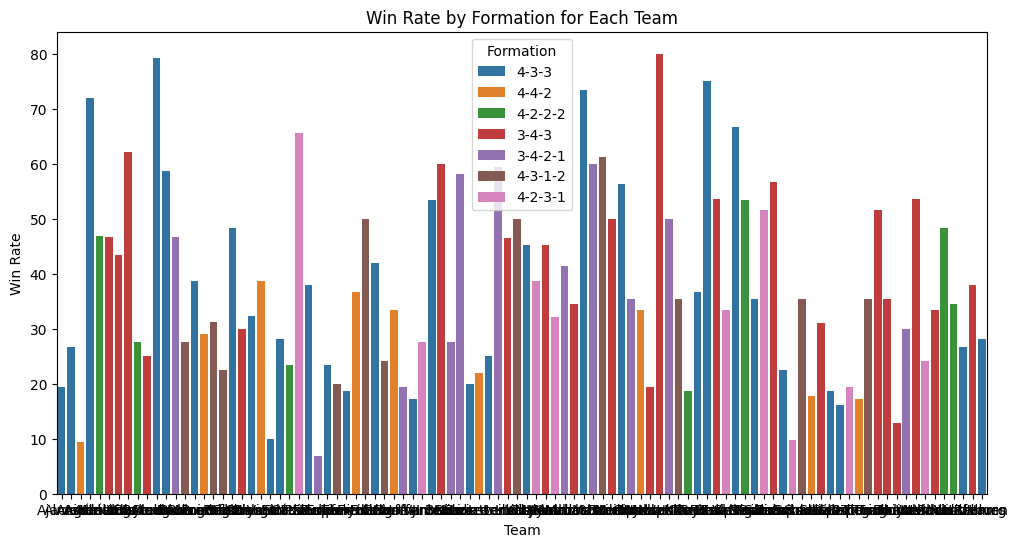

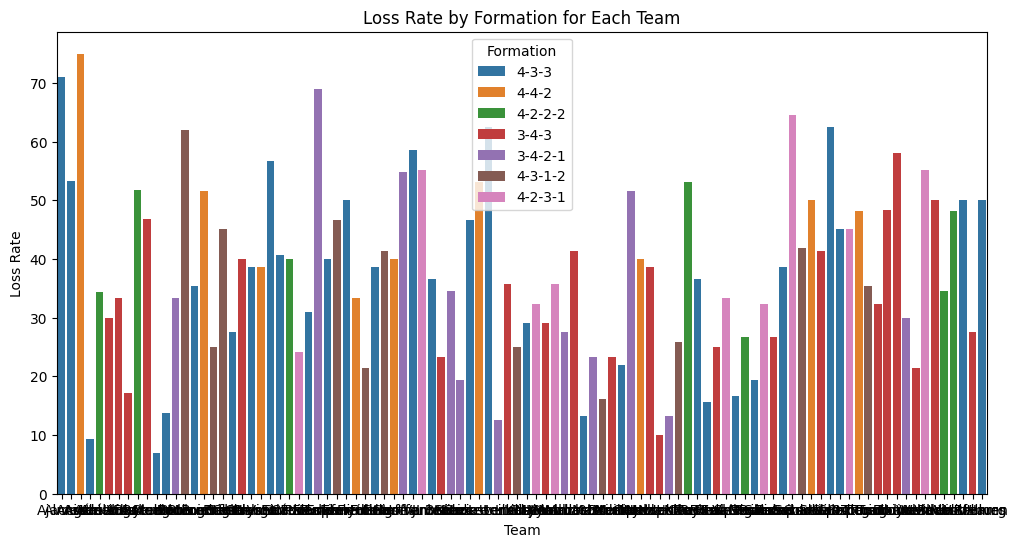

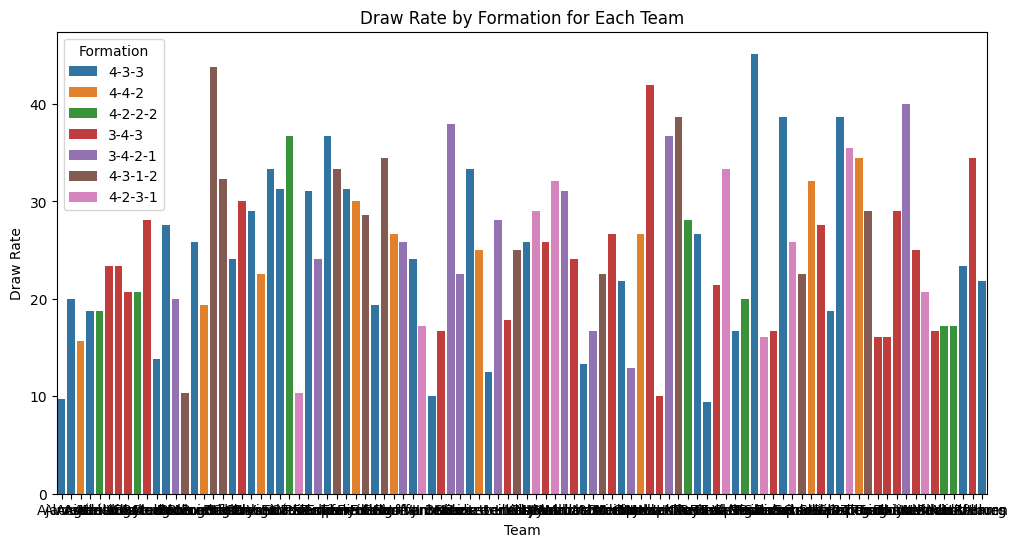

In [41]:
team_formation_performance = data_total.groupby(['team', 'formation'])[['Pts', 'win_rate', 'loss_rate', 'draw_rate']].mean().reset_index()

# Vẽ biểu đồ điểm trung bình
plt.figure(figsize=(12, 6))
sns.barplot(x='team', y='Pts', hue='formation', data=team_formation_performance)
plt.title('Average Points per Match by Formation for Each Team')
plt.xlabel('Team')
plt.ylabel('Average Points')
plt.legend(title='Formation')
plt.show()

# Vẽ biểu đồ tỷ lệ thắng
plt.figure(figsize=(12, 6))
sns.barplot(x='team', y='win_rate', hue='formation', data=team_formation_performance)
plt.title('Win Rate by Formation for Each Team')
plt.xlabel('Team')
plt.ylabel('Win Rate')
plt.legend(title='Formation')
plt.show()

# Vẽ biểu đồ tỷ lệ thua
plt.figure(figsize=(12, 6))
sns.barplot(x='team', y='loss_rate', hue='formation', data=team_formation_performance)
plt.title('Loss Rate by Formation for Each Team')
plt.xlabel('Team')
plt.ylabel('Loss Rate')
plt.legend(title='Formation')
plt.show()

# Vẽ biểu đồ tỷ lệ hòa
plt.figure(figsize=(12, 6))
sns.barplot(x='team', y='draw_rate', hue='formation', data=team_formation_performance)
plt.title('Draw Rate by Formation for Each Team')
plt.xlabel('Team')
plt.ylabel('Draw Rate')
plt.legend(title='Formation')
plt.show()